In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def entropy(x,n=10):
    x=x.reshape(1,-1)[0]
    scale=(x.max()-x.min())/n
    entropy=0
    for i in range(n):
        p=np.average((x>=x.min()+i*scale)&(x<x.min()+(i+1)*scale))
        if p!=0:
            entropy-=p*np.log(p)
    return entropy

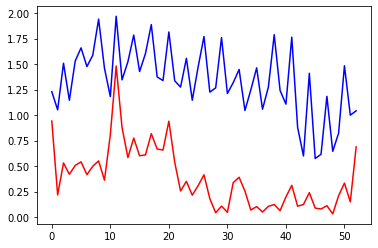

In [4]:
#mobilenetv2
#cifar10
def Draw(path,color='r'):
    ckpt=torch.load(path)['net']
    y=[]
    for keys,layer in ckpt.items():
        if 'conv' in keys: 
            y.append(entropy(layer.cpu().numpy()))
            #for kernel in layer.cpu().numpy():
                #y.append(entropy(kernel))
    plt.plot(range(len(y)),y,color=color)
Draw('checkpoint/5.05/ckpt1_149.t7','b')
Draw('checkpoint/4.25/ckpt3_141.t7','r')
plt.savefig('entropy_compare.eps')

In [31]:
def small_l1(ckpt,threshold):
    total=0
    x=0
    for key,value in ckpt.items():
        if 'conv' in key:
            total+=value.shape[0]
            #print(torch.norm(value,p=1,dim=(1,2,3)))
            x+=torch.sum(torch.norm(value,p=1,dim=(1,2,3))<threshold)
    return x/float(total)

In [6]:
ckpt1=torch.load('checkpoint/22.94/ckpt1_149.t7')['net']
ckpt2=torch.load('checkpoint/4.25/ckpt4_131.t7')['net']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


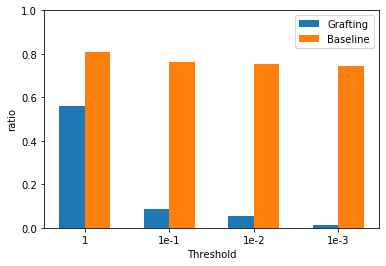

In [20]:
grafting=[]
baseline=[]
Thresholds = ['1','1e-1','1e-2','1e-3']
for threshold in [0.1**(i) for i in range(len(Thresholds))]:
    grafting.append(small_l1(ckpt1,threshold))
    baseline.append(small_l1(ckpt2,threshold))
x = range(len(Thresholds))
plt.bar([i - 0.05 for i in x], grafting,label='Grafting', width=0.3)
plt.bar([i + 0.25 for i in x], baseline,label='Baseline', width=0.3)
plt.xticks([i + 0.1 for i in x], Thresholds)
plt.ylim(0,1)
plt.xlabel('Threshold')
plt.ylabel('Ratio')
plt.legend(loc='upper right')
plt.savefig('l1_threshold.eps')